In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Leer Datos

In [2]:
url_train = "https://github.com/sonder-art/automl_p24/raw/main/codigo/ml_practico/data_train_fs.parquet"
data_train = pd.read_parquet(url_train)
data_train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,application_type,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off
62394,3600.0,3600.0,36 months,14.49,123.90,C,C4,Pricing Specialist,2 years,RENT,...,Individual,3.0,6356.0,244.0,97.6,256.0,3.0,0.0,6.0,0
2333,20000.0,20000.0,36 months,12.99,673.79,C,C2,Service Director,4 years,MORTGAGE,...,Individual,5.0,1746.0,10395.0,38.9,170.0,3.0,2.0,4.0,0
91099,10000.0,10000.0,60 months,9.17,208.41,B,B1,None,None,OWN,...,Individual,3.0,13992.0,14168.0,21.7,201.0,4.0,5.0,4.0,0
31904,1500.0,1500.0,36 months,12.39,50.11,C,C1,Manager,8 years,MORTGAGE,...,Individual,9.0,15575.0,10278.0,42.3,227.0,0.0,3.0,4.0,0
58152,21000.0,21000.0,36 months,9.17,669.46,B,B1,Research Scientist,8 years,MORTGAGE,...,Individual,2.0,31205.0,888.0,97.1,356.0,27.0,3.0,7.0,0


In [3]:
url_test = "https://github.com/sonder-art/automl_p24/raw/main/codigo/ml_practico/data_test_fs.parquet"
data_test = pd.read_parquet(url_test)
data_test.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,application_type,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off
92063,10000.0,10000.0,36 months,11.67,330.57,B,B4,Client Account Manager,6 years,OWN,...,Individual,3.0,12731.0,6388.0,48.9,136.0,52.0,1.0,4.0,0
88089,20000.0,20000.0,36 months,12.99,673.79,C,C1,Manager-Finance,2 years,RENT,...,Individual,7.0,5506.0,32034.0,59.0,184.0,3.0,0.0,18.0,0
63335,20000.0,20000.0,60 months,16.29,489.45,D,D2,CDL driver,< 1 year,OWN,...,Individual,7.0,4853.0,2724.0,69.7,92.0,1.0,0.0,5.0,1
63184,8000.0,8000.0,36 months,10.99,261.88,B,B3,Teacher,10+ years,MORTGAGE,...,Individual,3.0,1668.0,1013.0,87.0,200.0,1.0,0.0,5.0,0
96477,28000.0,28000.0,36 months,6.03,852.20,A,A1,Software Developer,3 years,MORTGAGE,...,Individual,3.0,11818.0,40688.0,25.3,142.0,17.0,1.0,2.0,0


In [4]:
datos_dict = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
datos_dict.columns = ['feature', 'description']

In [5]:
datos_dict

,feature,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


## Feature Analysis & Eng

Analisemos las variables que seleccionamos mas a detalle.

Funcion Auxiliar para clasificar el tipo de variables.

In [6]:
def _check_type(value):
    ''' 
    Infiere si la variable es categorica o numerica
    apartir del tipo
    '''
    if value==object:
        return 'categorica'
    elif value==bool:
        return 'categorica' 
    elif value=='int64':
        return 'numerica'
    elif value=='float64':
        return 'numerica'

Obtengamos el tipo de cada variable

In [7]:
feature_type = pd.DataFrame(data_train.dtypes)
feature_type[0] = feature_type[0].apply(lambda x: _check_type(x))
feature_type.reset_index(inplace=True)
feature_type.rename(columns={'index':'feature',0:'tipo'},inplace=True)
feature_type.head(3)

,feature,tipo
0,loan_amnt,numerica
1,funded_amnt,numerica
2,term,categorica


In [8]:
feature_type_ts = pd.DataFrame(data_test.dtypes)
feature_type_ts[0] = feature_type_ts[0].apply(lambda x: _check_type(x))
feature_type_ts.reset_index(inplace=True)
feature_type_ts.rename(columns={'index':'feature',0:'tipo'},inplace=True)
feature_type_ts.head(3)

,feature,tipo
0,loan_amnt,numerica
1,funded_amnt,numerica
2,term,categorica


In [9]:
(feature_type != feature_type_ts).sum()

feature    0
tipo       1
dtype: int64

Resulta que la ultima columna no es igual


In [10]:
(feature_type != feature_type_ts).values[-1]

array([False,  True])

In [11]:
feature_type.values[-1]

array(['charged_off', None], dtype=object)

In [12]:
feature_type_ts.values[-1]

array(['charged_off', None], dtype=object)

In [13]:
feature_type_ts.values[-1][0] == feature_type.values[-1][0]

True

In [14]:
data_train.dtypes

loan_amnt                float64
funded_amnt              float64
term                      object
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_title                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
purpose                   object
title                     object
zip_code                  object
addr_state                object
dti                      float64
earliest_cr_line          object
fico_range_low           float64
fico_range_high          float64
open_acc                 float64
revol_util               float64
initial_list_status       object
last_pymnt_amnt          float64
application_type          object
acc_open_past_24mths     float64
avg_cur_bal              float64
bc_open_to_buy           float64
bc_util                  float64
mo_sin_old_rev_tl_op     float64
mo_sin_rcn

In [15]:
data_test.dtypes

loan_amnt                float64
funded_amnt              float64
term                      object
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_title                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
purpose                   object
title                     object
zip_code                  object
addr_state                object
dti                      float64
earliest_cr_line          object
fico_range_low           float64
fico_range_high          float64
open_acc                 float64
revol_util               float64
initial_list_status       object
last_pymnt_amnt          float64
application_type          object
acc_open_past_24mths     float64
avg_cur_bal              float64
bc_open_to_buy           float64
bc_util                  float64
mo_sin_old_rev_tl_op     float64
mo_sin_rcn

In [16]:
data_train['charged_off'].unique()

array([0, 1], dtype=uint8)

In [17]:
data_test['charged_off'].unique()

array([0, 1], dtype=uint8)

Parece que no hay diferencia en las columnas, parece ser un bug. Continuemos

### Variables Categoricas

In [18]:
features_cat = feature_type[feature_type['tipo']=='categorica']['feature']
features_cat = list(features_cat)
features_cat

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

#### Seleccion de Variables Categoricas a explorar

In [19]:
# Lista de variables categoricas a eliminar
cat_eliminar = []
data_train[features_cat].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
count,68910,68910,68910,65158,65165,68910,68910,68910,68910,68910,68910,68910,68910,68910
unique,2,7,35,27462,11,4,3,13,20,843,46,593,2,1
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,Debt consolidation,750xx,CA,Aug-2001,w,Individual
freq,54033,18628,4180,1266,22577,33440,27201,42404,42416,760,10049,591,35197,68910


Eliminemos `application type` pues solo tiene un valor. Es inutil para predecir.

Eliminemos `emp_title`, `zip_code` pues tienen muchos valores, y hacer one-hot encoding (dummies) aumentaria sustancialmente el numero de variables. En escencia podrian ser variables muy utilies, pero requieren de un tratamiento mas cuidadoso que es mejor dejar para otra ocasion. 

In [20]:
cat_eliminar = cat_eliminar + ['emp_title', 'zip_code', 'application_type']

In [21]:
# Para mejorar la visualizacion de las variables categoricas que nos quedan
# por analizar
features_cat = [f for f in features_cat if f not in cat_eliminar]
data_train[features_cat].describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,initial_list_status
count,68910,68910,68910,65165,68910,68910,68910,68910,68910,68910,68910
unique,2,7,35,11,4,3,13,20,46,593,2
top,36 months,C,C1,10+ years,MORTGAGE,Source Verified,debt_consolidation,Debt consolidation,CA,Aug-2001,w
freq,54033,18628,4180,22577,33440,27201,42404,42416,10049,591,35197


+ `term`:  "The number of payments on the loan. Values are in months and can be either 36 or 60. The 60 Months loans are more likelely to charge off."   
Es la duracion del prestamo, facilmente podemos convertirla a dummy, pues toma solo dos valores.

+ `purpose` y `title` que por la descripcion parecen tener valores similares.

In [22]:
data_train[['title', 'purpose']].drop_duplicates()

,title,purpose
62394,Other,other
2333,Debt consolidation,debt_consolidation
31904,Home improvement,home_improvement
58152,Credit card refinancing,credit_card
38785,Major purchase,major_purchase
...,...,...
64245,Medical expenses,home_improvement
27646,Other,small_business
33047,Green loan,other
41579,Medical expenses,debt_consolidation


+ `title` se parece a `purpose`, pero con menos valores, ademas de parecer mas certero. Elijamos `purpose` para mantener un modelo parsimonioso.

In [23]:
cat_eliminar = cat_eliminar + ['title']
# Para facilitar la visualizacion
features_cat = [f for f in features_cat if f not in cat_eliminar]
data_train[features_cat].describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,earliest_cr_line,initial_list_status
count,68910,68910,68910,65165,68910,68910,68910,68910,68910,68910
unique,2,7,35,11,4,3,13,46,593,2
top,36 months,C,C1,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,Aug-2001,w
freq,54033,18628,4180,22577,33440,27201,42404,10049,591,35197


+ `grade` y `sub_grade`son muy parecidas. Intuitivamente sabemos que subgrade contiene a grade, y que son variables muy importantes. Por lo anterior, lo conveniente seria analizar el poder explicativo de cada una y decidir. 
Ademas, dada la naturaleza de la variable incluso podrias convertirla en numerica sin perder mucho poder explicativo, siempre y cuando este bien construida de inicio.

In [24]:
data_train[['grade', 'sub_grade']].drop_duplicates()

,grade,sub_grade
62394,C,C4
2333,C,C2
91099,B,B1
31904,C,C1
83758,D,D3
71868,B,B3
98443,D,D1
80936,D,D4
49867,B,B2
31119,A,A4


+ Intuitivamente `emp_length` parece una variable categorica importante, y facil de convertir a valor numerico sin perder poder explicativo. 

In [25]:
data_train['emp_length'].unique()

array(['2 years', '4 years', None, '8 years', '10+ years', '< 1 year',
       '6 years', '3 years', '5 years', '9 years', '7 years', '1 year'],
      dtype=object)

+ `home_ownership` y `verification_status` parecen ser buenas variables de inicio, y no tienen tantos valores unicos. Son aptas para hacer one-hot encoding.

In [26]:
data_train['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [27]:
data_train['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

+ `initial_list_status` no esta claro que significa, sin embargo no hay evidencia para eliminarla, por ahora. Pero, debemos de estar seguros que conoceremos el valor de esta variable antes de incluirla, pues seria inservible y arruinaria nuestro modelo.

In [28]:
datos_dict[datos_dict['feature'] == 'initial_list_status'].values

array([['initial_list_status',
        'The initial listing status of the loan. Possible values are – W, F']],
      dtype=object)

In [29]:
data_train['initial_list_status'].values

array(['w', 'f', 'w', ..., 'w', 'f', 'f'], dtype=object)

In [30]:
data_train['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

+ `earliest_cr_line` es otra variable que podemos convertir en numerica o simplificarla sin perder mucho poder predictivo.

In [31]:
data_train['earliest_cr_line'].unique()

array(['May-1993', 'Oct-2000', 'Nov-1997', 'Nov-1995', 'Feb-1985',
       'Feb-2002', 'May-2005', 'Dec-1993', 'Jun-2001', 'May-2000',
       'Feb-2003', 'Feb-2001', 'Sep-2005', 'Jun-2006', 'Jan-1987',
       'Aug-2009', 'Jul-1994', 'Jul-2002', 'Sep-1995', 'May-1999',
       'Jul-1988', 'Nov-2002', 'Apr-2005', 'Nov-2007', 'Dec-1995',
       'Aug-1994', 'Oct-2001', 'Oct-2002', 'Apr-1998', 'Oct-1985',
       'Dec-2005', 'Aug-2005', 'Sep-2001', 'Sep-2010', 'Mar-1986',
       'Nov-1991', 'Mar-2003', 'Jun-1994', 'Nov-1994', 'Dec-1999',
       'Sep-2008', 'Apr-2009', 'Oct-2006', 'Aug-1989', 'Oct-2004',
       'May-2003', 'Jun-2005', 'Sep-1994', 'Nov-1989', 'Nov-2004',
       'Aug-2000', 'Dec-2007', 'Feb-1972', 'May-1996', 'Sep-2003',
       'Aug-2003', 'Oct-2007', 'Oct-2003', 'Aug-2002', 'Jul-2000',
       'Mar-1996', 'Feb-1994', 'Apr-1999', 'Apr-1997', 'Nov-2010',
       'Mar-1992', 'Aug-2001', 'Jun-1985', 'Jan-2008', 'Oct-1988',
       'Aug-1998', 'Apr-1996', 'Jul-2003', 'May-2006', 'Jul-20

+ Por ultimo queda `addr_state` que si bien podria tener algo de poder explicativo, toma muchos valores. Es dificil convertirla en numerica o reducir su dimensionalidad. Sera para otra ocasion

In [32]:
cat_eliminar = cat_eliminar + ['addr_state']

Ahora que hemos elegido las variables categoricas que posiblemnte nos sirvan, hay que analizarlas a detalle despues de transformarlas.

In [33]:
features_cat = [f for f in features_cat if f not in cat_eliminar]
data_train[features_cat].describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,earliest_cr_line,initial_list_status
count,68910,68910,68910,65165,68910,68910,68910,68910,68910
unique,2,7,35,11,4,3,13,593,2
top,36 months,C,C1,10+ years,MORTGAGE,Source Verified,debt_consolidation,Aug-2001,w
freq,54033,18628,4180,22577,33440,27201,42404,591,35197


In [34]:
data_train.drop(cat_eliminar, axis=1, inplace=True)
data_test.drop(cat_eliminar, axis=1, inplace=True)


In [35]:
data_train.shape

(68910, 29)

In [36]:
data_test.shape

(17228, 29)

#### Analisis de Variables Categoricas Seleccionadas

In [37]:
features_cat

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status']

In [38]:
data_train['sub_grade'].unique()

array(['C4', 'C2', 'B1', 'C1', 'D3', 'B3', 'D1', 'D4', 'B2', 'A4', 'C3',
       'F1', 'A1', 'B5', 'B4', 'A2', 'A5', 'E2', 'C5', 'G1', 'E4', 'D2',
       'D5', 'E3', 'E5', 'A3', 'F3', 'F5', 'E1', 'F4', 'F2', 'G2', 'G4',
       'G5', 'G3'], dtype=object)

In [39]:
data_train[features_cat] = data_train[features_cat].fillna('nan-missing')

In [40]:
data_test[features_cat] = data_test[features_cat].fillna('nan-missing') 

###### term

**term**: "The number of payments on the loan. Values are in months and can be either 36 or 60. The 60 Months loans are more likelely to charge off."
+ Podemos convertirla a variable numerica sin problema.

In [41]:
data_train['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [42]:
data_train['term'] = data_train['term'].apply(lambda s: np.int8(s.split()[0]))
# Aplica la misma transformacion al test, para que sea valida
data_test['term'] = data_test['term'].apply(lambda s: np.int8(s.split()[0]))

In [43]:
data_train.groupby('term')['charged_off'].value_counts(normalize=True).loc[:,1]

term
36    0.141543
60    0.354709
Name: proportion, dtype: float64

Podemos observar que el default o `charge_off` es doblemente probable cuando el periodo de prestamo son 60 meses comparado con el de 30.

###### emp_length

**emp_length**: Es el tiempo que lleva en su ultimo empleo. Podemos convertirla a numerica.

In [44]:
data_train['emp_length'].unique()

array(['2 years', '4 years', 'nan-missing', '8 years', '10+ years',
       '< 1 year', '6 years', '3 years', '5 years', '9 years', '7 years',
       '1 year'], dtype=object)

In [45]:
def emp_length_to_int(s):
    '''Variable auxiliar de limpieza de emp_length '''
    if pd.isnull(s):
        return -5 # Seria mejor imputar la media
    else:
        return np.int8(s.split()[0])
def transform_emp(data):
    data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['emp_length'].replace('< 1 year', '0 years', inplace=True)    
    data['emp_length'].replace('nan-missing', np.nan, inplace=True)    
    data['emp_length'] = data['emp_length'].apply(emp_length_to_int)

    return data

In [46]:
data_train = transform_emp(data_train)
data_test = transform_emp(data_test)


In [47]:
charge_off_rates = data_train.groupby(
    'emp_length')['charged_off'].value_counts(normalize=True).loc[:,1]
charge_off_rates

emp_length
-5     0.239786
 0     0.198976
 1     0.191840
 2     0.175783
 3     0.185287
 4     0.180038
 5     0.173949
 6     0.186257
 7     0.182621
 8     0.194957
 9     0.190528
 10    0.182088
Name: proportion, dtype: float64

In [48]:
data_train[['emp_length','charged_off']].corr()

,emp_length,charged_off
emp_length,1.000000,-0.022395
charged_off,-0.022395,1.000000


Podemos observar que esta variable no tiene mucho poder explicativo. La proporcion es parecida para cada valor, y parece no estar correlacionada con el target. En este caso los datos no soportan nuestra intuicion, hay que eliminarla.

In [49]:
data_train.drop(['emp_length'], axis=1, inplace=True)
data_test.drop(['emp_length'], axis=1, inplace=True)


In [50]:
data_train.shape

(68910, 28)

In [51]:
data_test.shape

(17228, 28)

###### sub_grade

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='sub_grade'>

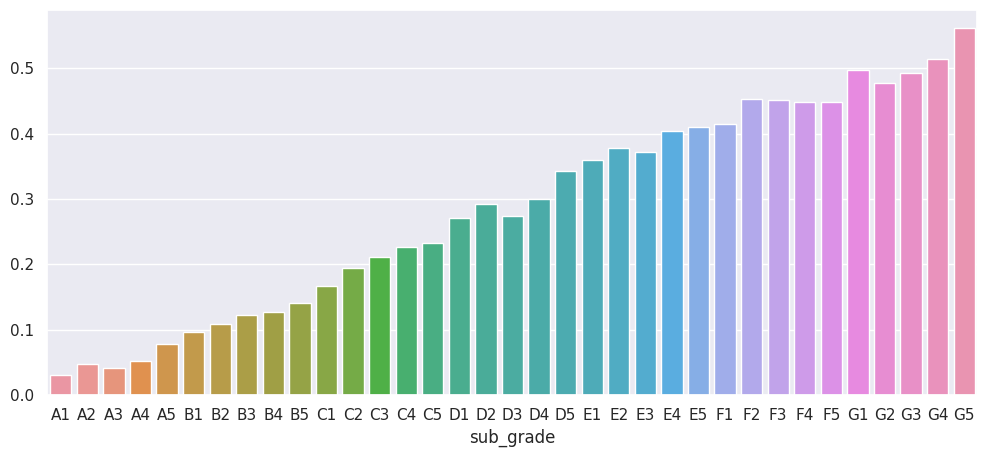

In [52]:
charge_off_rates = data_train.groupby('sub_grade'
            )['charged_off'].value_counts(normalize=True).loc[:,1]
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values)

Podemos observar que la probabilidad de incurrir en `charge_off` aumenta conforme el `sub_grade` decrece. En este caso los datos favorecen nuestra intuicion.

Dado que observamos un comportamiento monotono-decreciente que sigue cierta logica (mejor score menor probabilidad de fallo) podemos convertirla en variable numerica.

In [53]:
data_train['sub_grade']

62394    C4
2333     C2
91099    B1
31904    C1
58152    B1
         ..
2005     A3
64585    C1
86108    C1
6733     C2
46758    A2
Name: sub_grade, Length: 68910, dtype: object

In [54]:
l = data_train['sub_grade'].apply(str).unique()
l[-1] = 'missing-nan'
l

array(['C4', 'C2', 'B1', 'C1', 'D3', 'B3', 'D1', 'D4', 'B2', 'A4', 'C3',
       'F1', 'A1', 'B5', 'B4', 'A2', 'A5', 'E2', 'C5', 'G1', 'E4', 'D2',
       'D5', 'E3', 'E5', 'A3', 'F3', 'F5', 'E1', 'F4', 'F2', 'G2', 'G4',
       'G5', 'missing-nan'], dtype=object)

In [55]:
# Este es un encoder de labels no de Xs, sin embargo lo usaremos.
from sklearn.preprocessing import LabelEncoder
label_f = LabelEncoder()
lf = data_train['sub_grade'].apply(str).unique()
lf[-1] = 'missing-nan'
label_f.fit(lf)
data_train['sub_grade'] = label_f.fit_transform(data_train['sub_grade'])

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Nota como arriba usamos fit_transform para `train` y abajo solo transform para el `test`

In [56]:
data_test['sub_grade'] = label_f.transform(data_test['sub_grade'])

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='sub_grade'>

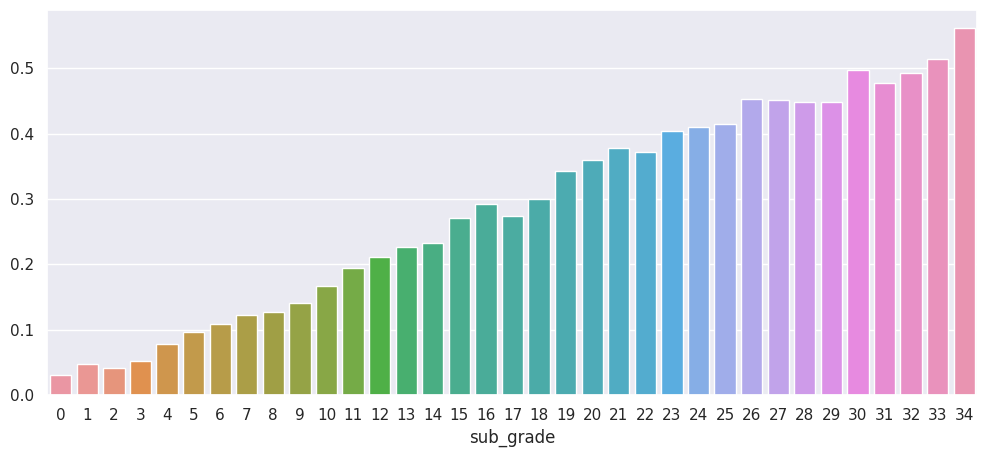

In [57]:
charge_off_rates = data_train.groupby('sub_grade'
            )['charged_off'].value_counts(normalize=True).loc[:,1]
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values)

Ahora podemos eliminar `grade`, pues logramos usar una variable mas granular.

In [58]:
data_train[['sub_grade', 'charged_off']].corr()

,sub_grade,charged_off
sub_grade,1.000000,0.281794
charged_off,0.281794,1.000000


In [59]:
data_train.drop(['grade'], axis=1, inplace=True)
data_test.drop(['grade'], axis=1, inplace=True)


In [60]:
data_train.shape

(68910, 27)

In [61]:
data_test.shape

(17228, 27)

###### home_ownership

In [62]:
data_train['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [63]:
data_test['home_ownership'].unique()


array(['OWN', 'RENT', 'MORTGAGE'], dtype=object)

Nota como el `test` no tiene el valor de `ANY`, y ademas solo hay una observacion con ese valor. Por simplicidad vamos a removerlo.

In [64]:
charge_off_rates = data_train.groupby(
    'home_ownership')['charged_off'].value_counts(normalize=True).loc[:,1]
charge_off_rates

home_ownership
MORTGAGE    0.166388
OWN         0.189057
RENT        0.212225
Name: proportion, dtype: float64

In [65]:
data_train[data_train['home_ownership']=='ANY']

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off
80625,5000.0,5000.0,36,11.67,165.29,8,ANY,35680.0,Source Verified,debt_consolidation,...,5048.63,5.0,18703.0,4381.0,43.1,92.0,3.0,1.0,3.0,0


Observamos como el valor `ANY` solo aprece una vez, es mejor eliminarlo.

In [66]:
data_train = data_train[data_train['home_ownership']!='ANY']

Aqui utilizamos el metodo `get_dummies` de pandas pues vamos a eliminar algunas columnas. La verdad es que como tenemos que replicar los resultados en el test, talvez convendria utilizar la funcion `one_hot_encoder` de sklearn. De manera que podamos replicarla esta transformacion en el `test` de madera fidedigna. Recuerda que las transformaciones deben de ser entrenadas con el `train`.   

Adicionalemnte, revisa si existen dummies o valores que aparezcan en el `test` pero no en el `train` de lo contrario podrian aparecer problemas pues tu codigo no sabria que hacer. Revisa el argumento `handle_unknown` en la funsion de sklearn. Este argumento te permite crear una columna de dummies para variables nunca antes vistas.

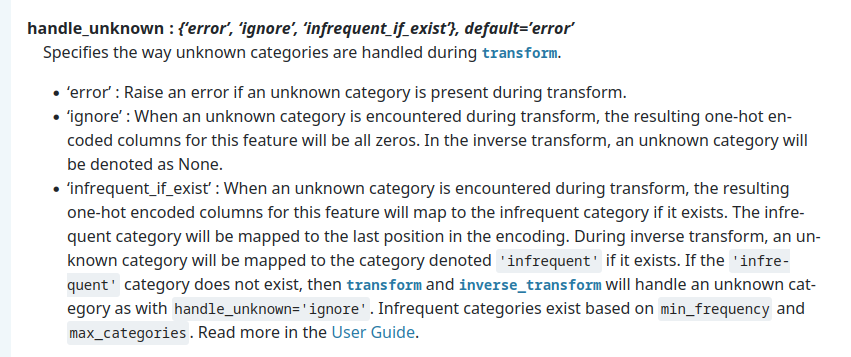

In [67]:
pd.get_dummies(data_train[['home_ownership', 'charged_off']], columns=['home_ownership'], 
               drop_first=True).corr()

,charged_off,home_ownership_OWN,home_ownership_RENT
charged_off,1.000000,0.001303,0.052711
home_ownership_OWN,0.001303,1.000000,-0.284655
home_ownership_RENT,0.052711,-0.284655,1.000000


Observemos como `home_ownership_OWN` tiene una correlacion muy baja con el objetivo. Para ser parsimoniosos podemos quitarlas.

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [69]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
a = enc.fit_transform(X=data_train[['home_ownership']])
a = pd.DataFrame(a)
a.columns = enc.get_feature_names_out()
a.head()

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a

,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [70]:
data_train[a.columns] = a.values

In [71]:
data_train

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
62394,3600.0,3600.0,36,14.49,123.90,13,RENT,128000.0,Not Verified,other,...,244.0,97.6,256.0,3.0,0.0,6.0,0,0.0,0.0,1.0
2333,20000.0,20000.0,36,12.99,673.79,11,MORTGAGE,50000.0,Source Verified,debt_consolidation,...,10395.0,38.9,170.0,3.0,2.0,4.0,0,1.0,0.0,0.0
91099,10000.0,10000.0,60,9.17,208.41,5,OWN,50000.0,Verified,debt_consolidation,...,14168.0,21.7,201.0,4.0,5.0,4.0,0,0.0,1.0,0.0
31904,1500.0,1500.0,36,12.39,50.11,10,MORTGAGE,62000.0,Not Verified,home_improvement,...,10278.0,42.3,227.0,0.0,3.0,4.0,0,1.0,0.0,0.0
58152,21000.0,21000.0,36,9.17,669.46,5,MORTGAGE,121000.0,Source Verified,credit_card,...,888.0,97.1,356.0,27.0,3.0,7.0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,28000.0,28000.0,36,6.99,864.44,2,OWN,170000.0,Source Verified,credit_card,...,1730.0,65.4,214.0,11.0,3.0,4.0,1,0.0,1.0,0.0
64585,12000.0,12000.0,36,12.99,404.27,10,RENT,86955.0,Not Verified,credit_card,...,916.0,94.8,156.0,2.0,0.0,11.0,0,0.0,0.0,1.0
86108,14800.0,14800.0,60,12.99,336.67,10,RENT,98000.0,Source Verified,debt_consolidation,...,894.0,89.7,233.0,61.0,0.0,4.0,0,0.0,0.0,1.0
6733,3600.0,3600.0,36,12.99,121.29,11,MORTGAGE,65000.0,Not Verified,medical,...,241.0,98.1,144.0,97.0,2.0,5.0,0,1.0,0.0,0.0


In [72]:
data_train.drop(columns=['home_ownership_OWN', 'home_ownership'], inplace=True)


In [73]:
b = enc.transform(X=data_test[['home_ownership']])
b = pd.DataFrame(b)
b.columns = enc.get_feature_names_out()
b.head()

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [74]:
data_test[b.columns] = b.values
data_test.drop(columns=['home_ownership_OWN', 'home_ownership'], inplace=True)


In [75]:
data_test

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,annual_inc,verification_status,purpose,dti,...,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off,home_ownership_MORTGAGE,home_ownership_RENT
92063,10000.0,10000.0,36,11.67,330.57,8,44000.0,Not Verified,other,17.84,...,12731.0,6388.0,48.9,136.0,52.0,1.0,4.0,0,0.0,0.0
88089,20000.0,20000.0,36,12.99,673.79,10,85000.0,Source Verified,credit_card,28.42,...,5506.0,32034.0,59.0,184.0,3.0,0.0,18.0,0,0.0,1.0
63335,20000.0,20000.0,60,16.29,489.45,16,80000.0,Source Verified,debt_consolidation,16.26,...,4853.0,2724.0,69.7,92.0,1.0,0.0,5.0,1,0.0,0.0
63184,8000.0,8000.0,36,10.99,261.88,7,53000.0,Verified,debt_consolidation,6.20,...,1668.0,1013.0,87.0,200.0,1.0,0.0,5.0,0,1.0,0.0
96477,28000.0,28000.0,36,6.03,852.20,0,102000.0,Source Verified,debt_consolidation,8.94,...,11818.0,40688.0,25.3,142.0,17.0,1.0,2.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,7500.0,7500.0,36,10.49,243.74,7,75000.0,Not Verified,debt_consolidation,13.50,...,14014.0,406.0,83.8,119.0,2.0,4.0,8.0,0,1.0,0.0
81903,15000.0,15000.0,36,14.99,519.91,14,145000.0,Verified,debt_consolidation,16.06,...,18917.0,18674.0,44.1,169.0,1.0,3.0,6.0,1,1.0,0.0
7309,5000.0,5000.0,36,12.39,167.01,10,26000.0,Verified,other,6.93,...,15800.0,NaN,NaN,268.0,87.0,1.0,0.0,0,1.0,0.0
70056,6000.0,6000.0,36,13.98,205.01,12,105000.0,Not Verified,home_improvement,14.03,...,45995.0,1059.0,69.7,128.0,76.0,5.0,2.0,0,1.0,0.0


###### verification_status

In [76]:
pd.get_dummies(data_train[['verification_status', 'charged_off']], columns=['verification_status'], 
               drop_first=True).corr()

,charged_off,verification_status_Source Verified,verification_status_Verified
charged_off,1.000000,0.047626,0.059923
verification_status_Source Verified,0.047626,1.000000,-0.494985
verification_status_Verified,0.059923,-0.494985,1.000000


In [77]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
a = enc.fit_transform(X=data_train[['verification_status']])
a = pd.DataFrame(a)
a.columns = enc.get_feature_names_out()
data_train[a.columns] = a.values

b = enc.transform(X=data_test[['verification_status']])
b = pd.DataFrame(b)
b.columns = enc.get_feature_names_out()
data_test[b.columns] = b.values


/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a

In [78]:
data_test.drop(columns=['verification_status'], inplace=True)
data_train.drop(columns=['verification_status'], inplace=True)


###### 'purpose'

In [79]:
data_train['purpose'].unique()

array(['other', 'debt_consolidation', 'home_improvement', 'credit_card',
       'major_purchase', 'medical', 'vacation', 'small_business', 'car',
       'house', 'moving', 'renewable_energy', 'wedding'], dtype=object)

In [80]:
pd.get_dummies(data_train[['purpose', 'charged_off']], columns=['purpose'], 
               drop_first=True).corr()

,charged_off,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
charged_off,1.000000,-0.037441,0.030383,-0.011575,0.007163,-0.000290,0.000323,0.014492,0.002923,0.007482,0.023462,-0.002981,-0.003170
purpose_credit_card,-0.037441,1.000000,-0.673115,-0.123716,-0.031659,-0.070517,-0.055106,-0.044898,-0.122642,-0.015041,-0.051079,-0.038942,-0.003512
purpose_debt_consolidation,0.030383,-0.673115,1.000000,-0.294028,-0.075242,-0.167594,-0.130967,-0.106707,-0.291475,-0.035747,-0.121396,-0.092551,-0.008346
purpose_home_improvement,-0.011575,-0.123716,-0.294028,1.000000,-0.013829,-0.030803,-0.024071,-0.019612,-0.053572,-0.006570,-0.022312,-0.017011,-0.001534
purpose_house,0.007163,-0.031659,-0.075242,-0.013829,1.000000,-0.007883,-0.006160,-0.005019,-0.013709,-0.001681,-0.005710,-0.004353,-0.000393
purpose_major_purchase,-0.000290,-0.070517,-0.167594,-0.030803,-0.007883,1.000000,-0.013720,-0.011179,-0.030536,-0.003745,-0.012718,-0.009696,-0.000874
purpose_medical,0.000323,-0.055106,-0.130967,-0.024071,-0.006160,-0.013720,1.000000,-0.008736,-0.023862,-0.002927,-0.009938,-0.007577,-0.000683
purpose_moving,0.014492,-0.044898,-0.106707,-0.019612,-0.005019,-0.011179,-0.008736,1.000000,-0.019442,-0.002384,-0.008097,-0.006173,-0.000557
purpose_other,0.002923,-0.122642,-0.291475,-0.053572,-0.013709,-0.030536,-0.023862,-0.019442,1.000000,-0.006513,-0.022118,-0.016863,-0.001521
purpose_renewable_energy,0.007482,-0.015041,-0.035747,-0.006570,-0.001681,-0.003745,-0.002927,-0.002384,-0.006513,1.000000,-0.002713,-0.002068,-0.000186


En este caso casi todas las correlaciones son muy bajas, solo `purpose_credit_card` y `purpose_debt_consolidation` parecen ser utiles.  
Tambien se podrian colapsar variables, pero eso es recomendable para otra iteracion.

In [81]:
dummies_purpose = pd.get_dummies(data_train[['purpose', 'charged_off']], columns=['purpose'], 
               drop_first=True).corr().index
dummies_purpose = [v for v in dummies_purpose if v not in ['charged_off', 
                                                           'purpose_credit_card',
                                                           'purpose_debt_consolidation'
                                                           ]]
print(dummies_purpose)
dummies_purpose = [v.replace('purpose_','') for v in dummies_purpose]                                                           
print(dummies_purpose)                                               

['purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding']
['home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']


In [82]:
enc_p = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_p.fit(X=data_train[['purpose']])
a = enc_p.transform(X=data_train[['purpose']])
a = pd.DataFrame(a)
a.columns = enc_p.get_feature_names_out()
a.head()

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a

,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
data_train[a.columns] = a.values
data_train.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'annual_inc', 'purpose', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc', 'revol_util',
       'initial_list_status', 'last_pymnt_amnt', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_actv_rev_tl', 'charged_off',
       'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [84]:
dummies_purpose


['home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

In [85]:
dummies_purpose = [f'purpose_{v}' for v in dummies_purpose]
dummies_purpose

['purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding']

In [86]:
data_train.drop(columns=dummies_purpose + ['purpose'], inplace=True)
data_train.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'revol_util', 'initial_list_status',
       'last_pymnt_amnt', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_actv_rev_tl', 'charged_off',
       'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation'],
      dtype='object')

In [87]:
b = enc_p.transform(X=data_test[['purpose']])
b = pd.DataFrame(b)
b.columns = enc_p.get_feature_names_out()


/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [88]:
data_test[b.columns] = b.values
data_test.drop(columns=dummies_purpose + ['purpose'], inplace=True)
data_test.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'revol_util', 'initial_list_status',
       'last_pymnt_amnt', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_actv_rev_tl', 'charged_off',
       'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation'],
      dtype='object')

###### earliest_cr_line

In [89]:
data_train['earliest_cr_line'].head(3)

62394    May-1993
2333     Oct-2000
91099    Nov-1997
Name: earliest_cr_line, dtype: object

In [90]:
# Convirtamos sus valores a numerico
data_train['earliest_cr_line'] = data_train['earliest_cr_line'].apply(lambda x: float(x[4:]))

In [91]:
# Convirtamos sus valores a numerico
data_test['earliest_cr_line'] = data_test['earliest_cr_line'].apply(lambda x: float(x[4:]))

In [92]:
data_train['earliest_cr_line'] = data_train['earliest_cr_line'].apply(float)


In [93]:
data_train[['earliest_cr_line', 'charged_off']].corr()


,earliest_cr_line,charged_off
earliest_cr_line,1.0000,0.0371
charged_off,0.0371,1.0000


La correlacion no es la mejor, pero podemos dejarla.

###### initial_list_status

In [94]:
data_train['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [95]:
pd.get_dummies(data_train[['initial_list_status', 'charged_off']], 
               columns=['initial_list_status'], 
               drop_first=True).corr()

,charged_off,initial_list_status_w
charged_off,1.000000,0.042184
initial_list_status_w,0.042184,1.000000


La correlacion no es tan buena, no sabemos que es. Mejor hay que quitarla.

In [96]:
data_train.drop(columns=['initial_list_status'], inplace=True)
data_test.drop(columns=['initial_list_status'], inplace=True)


#### Aprendizaje

Ahora hemos terminado de convertir nuestras variables categoricas a numericas, de tal forma que nuestros algoritmos podran leerlas. Pasaremos a analizarlas en conjunto con nuestras variables numericas.

### Seleccion de Features Numericas

#### Feature with Feature Correlation

Eliminemos las variables explicativas que esten muy relacioandas entre si. La idea es que es informacion redundante.

In [97]:
feature_correlation = data_train.loc[:, data_train.columns != 'charged_off'].corr()
feature_correlation

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,annual_inc,dti,earliest_cr_line,fico_range_low,...,mort_acc,num_actv_rev_tl,home_ownership_MORTGAGE,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation
loan_amnt,1.000000,1.000000,0.367330,0.080988,0.956671,0.084632,0.364180,0.003323,-0.171954,0.145091,...,0.243868,0.154709,0.200340,-0.184593,-0.362525,0.124398,0.246756,-0.056403,0.041600,0.087242
funded_amnt,1.000000,1.000000,0.367330,0.080988,0.956671,0.084632,0.364180,0.003323,-0.171954,0.145091,...,0.243868,0.154709,0.200340,-0.184593,-0.362525,0.124398,0.246756,-0.056403,0.041600,0.087242
term,0.367330,0.367330,1.000000,0.411773,0.128861,0.415773,0.047040,0.069648,-0.026648,-0.001096,...,0.103979,0.046780,0.103920,-0.094412,-0.225842,0.144442,0.080279,-0.020105,-0.039081,0.076591
int_rate,0.080988,0.080988,0.411773,1.000000,0.077416,0.996027,-0.112137,0.200440,0.135515,-0.388159,...,-0.079198,0.079715,-0.073345,0.070496,-0.231382,0.036518,0.204533,-0.003878,-0.215252,0.088021
installment,0.956671,0.956671,0.128861,0.077416,1.000000,0.079749,0.357650,0.005255,-0.156677,0.104928,...,0.214369,0.160913,0.172256,-0.158649,-0.341596,0.096507,0.255229,-0.054538,0.030441,0.085397
sub_grade,0.084632,0.084632,0.415773,0.996027,0.079749,1.000000,-0.111163,0.201212,0.135391,-0.386220,...,-0.078305,0.078549,-0.072333,0.069408,-0.233982,0.037256,0.206472,-0.004058,-0.215662,0.087591
annual_inc,0.364180,0.364180,0.047040,-0.112137,0.357650,-0.111163,1.000000,-0.205742,-0.159659,0.100960,...,0.246141,0.070930,0.170615,-0.151340,-0.096553,0.024963,0.074682,-0.015785,-0.002058,-0.019312
dti,0.003323,0.003323,0.069648,0.200440,0.005255,0.201212,-0.205742,1.000000,-0.028244,-0.065152,...,-0.067936,0.256998,-0.022721,0.001110,-0.093154,0.049347,0.044337,-0.035021,-0.011282,0.080292
earliest_cr_line,-0.171954,-0.171954,-0.026648,0.135515,-0.156677,0.135391,-0.159659,-0.028244,1.000000,-0.101459,...,-0.300986,-0.148398,-0.178534,0.214500,0.084002,0.005886,-0.095257,0.022863,-0.005213,-0.007535
fico_range_low,0.145091,0.145091,-0.001096,-0.388159,0.104928,-0.386220,0.100960,-0.065152,-0.101459,1.000000,...,0.092138,-0.154297,0.116364,-0.127949,0.051583,-0.030997,-0.020522,0.014540,0.001953,-0.032780


<AxesSubplot: >

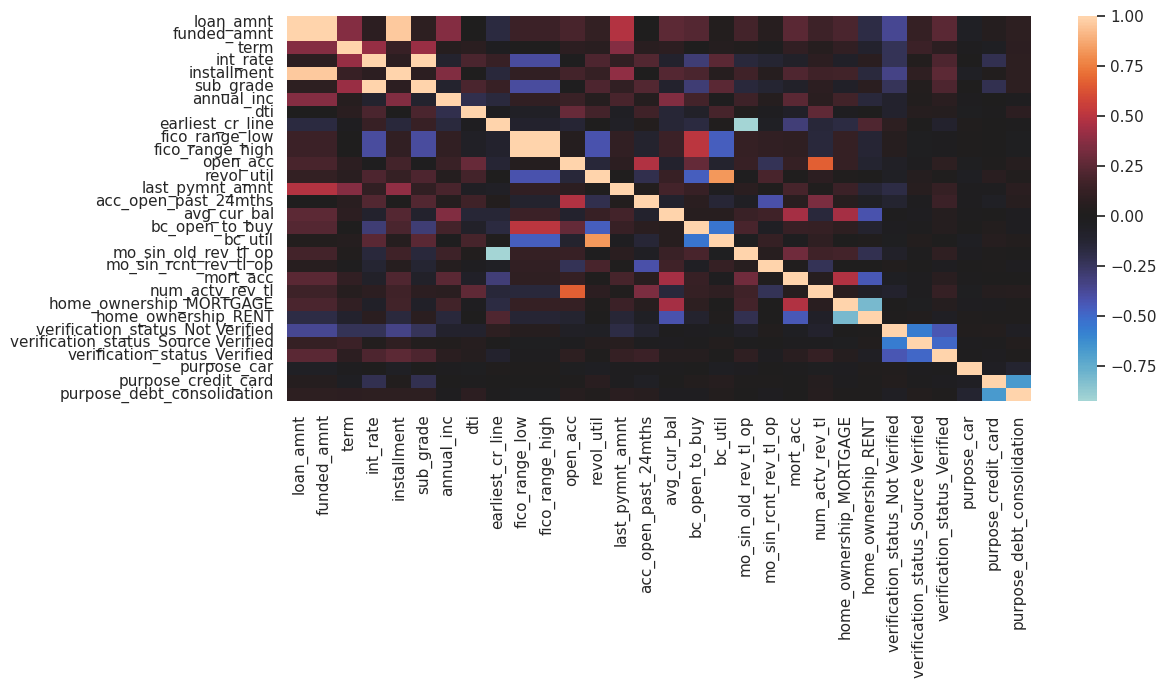

In [98]:
sns.heatmap(feature_correlation, 
        xticklabels=feature_correlation.columns,
        yticklabels=feature_correlation.columns, center=0)

In [99]:
# Solo usaremos la matriz triangular
# Recuerda que la matriz de correlacion es simetrica
upper = feature_correlation.where(np.triu(np.ones(
    feature_correlation.shape), k=1).astype(np.bool))

# Encuentra variables con correlacion mayor a threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop

/tmp/ipykernel_72418/3479894735.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  feature_correlation.shape), k=1).astype(np.bool))


['funded_amnt', 'installment', 'sub_grade', 'fico_range_high']

In [100]:
# Eliminar columnas 
data_train.drop(to_drop, axis=1, inplace=True)
data_test.drop(to_drop, axis=1, inplace=True)

<AxesSubplot: >

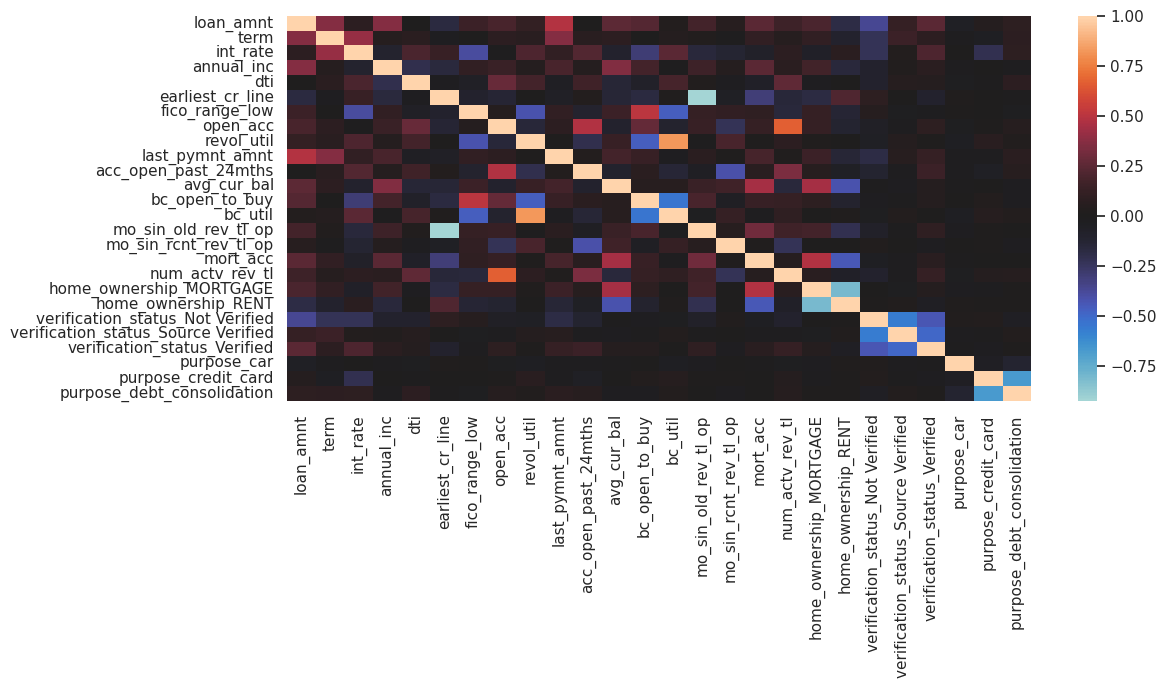

In [101]:
feature_correlation = data_train.loc[:, data_train.columns != 'charged_off'].corr()
sns.heatmap(feature_correlation, 
        xticklabels=feature_correlation.columns,
        yticklabels=feature_correlation.columns, center=0)

In [102]:
data_train.to_parquet('data_train_model.parquet')
data_test.to_parquet('data_test_model.parquet')
